# Overarching Task:

## Flight Booking Cuve
   - Just Flight Level
    - Cabin Lvel [Business vs Economy]
    - Booking Class Level (Price Fluctuations)
    
## Flight Booking Class Fare
- Fare Avg - just group all flight and do
- Cabin Fare Avg - group by cabin and do
- Booking Fare Avg - do the whole dataset

In [131]:
import pandas as pd

In [132]:
s = '/Users/aniruddhamukherjee/Downloads/Fin-A-Lytics | Dataset Modified/12month_flight_booking_code_OVERALL_csv.csv'

df = pd.read_csv(s)

In [134]:
rename_space = {' Origin': 'Origin' , ' Destination':'Destination', ' Booking Class Fare USD ': 'Booking Class Fare USD'}
df.rename(columns=rename_space, inplace=True)
df

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,...,B: 9,B: 8,B: 7,B: 6,B: 5,B: 4,B: 3,B: 2,B: 1,B: 0
0,0,BBB,DDD,Y,N,200.01,AA,304,10/04/22,05:55,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10
1,1,BBB,DDD,Y,H,463.65,AA,304,10/04/22,05:55,...,0.0,0.0,0.0,1.0,6.0,7.0,7.0,7.0,7.0,7
2,2,BBB,DDD,Y,G,149.83,AA,304,10/04/22,05:55,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,3,BBB,DDD,Y,T,127.29,AA,304,10/04/22,05:55,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
4,4,BBB,DDD,Y,S,90.92,AA,304,10/04/22,05:55,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195769,212776,YYY,CCC,Y,I,262.00,AA,65,20/09/23,17:45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
195770,212777,YYY,CCC,Y,T,301.27,AA,65,20/09/23,17:45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
195771,212778,YYY,CCC,Y,M,386.14,AA,65,20/09/23,17:45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
195772,212779,YYY,CCC,Y,H,809.18,AA,65,20/09/23,17:45,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5


In [136]:
data = df.copy()

In [137]:
data = data.drop(["Unnamed: 0", "Booking Class", "Airline"], axis=1)

# Aggregating the cols Vertically as Multiple Rows Indicate 1 flight.
## The code below, makes 1 row for 1 flight's B class and another for Y Class

In [138]:
grouping_keys = ['Origin', 'Destination', 'Flight number', 'Dep_Date', 'Dep_time', 'Cabin']

# # Select only 'B' columns and 'Booking Class Fare USD' for summing
# b_columns = [col for col in data.columns if col.startswith('B: ')]
# selected_columns = b_columns + ['Booking Class Fare USD']

# Step 2: Sum the values within each group
# We'll use sum for all 'B: x' columns and 'Booking Class Fare USD'
aggregated_data_corrected = data.groupby(grouping_keys).sum().reset_index()


# Step 2: Correctly sum the values within each group
correct_aggregated_data = data.groupby(grouping_keys).sum().reset_index()

correct_aggregated_data

,Origin,Destination,Flight number,Dep_Date,Dep_time,Cabin,Booking Class Fare USD,B: 365,B: 364,B: 363,...,B: 9,B: 8,B: 7,B: 6,B: 5,B: 4,B: 3,B: 2,B: 1,B: 0
0,AAA,BBB,1385,01/02/23,06:10,J,2383.25,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3
1,AAA,BBB,1385,01/02/23,06:10,Y,5975.31,0.0,0.0,0.0,...,79.0,80.0,80.0,79.0,79.0,79.0,80.0,75.0,75.0,74
2,AAA,BBB,1385,01/03/23,06:10,J,2383.25,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3
3,AAA,BBB,1385,01/03/23,06:10,Y,5975.31,0.0,0.0,0.0,...,82.0,82.0,83.0,85.0,87.0,89.0,86.0,86.0,84.0,84
4,AAA,BBB,1385,01/04/23,06:10,J,2383.25,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18569,ZZZ,YYY,572,31/07/23,23:55,Y,9339.44,0.0,0.0,0.0,...,37.0,37.0,35.0,36.0,39.0,41.0,43.0,45.0,44.0,48
18570,ZZZ,YYY,572,31/08/23,23:55,J,5088.42,0.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,1
18571,ZZZ,YYY,572,31/08/23,23:55,Y,9339.44,0.0,0.0,0.0,...,44.0,43.0,44.0,44.0,44.0,44.0,44.0,46.0,48.0,48
18572,ZZZ,YYY,2017,24/02/23,07:00,J,5130.09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [139]:
# correct_aggregated_data.to_csv("corrected_agg__.csv")
grouped_df = correct_aggregated_data.copy()

In [141]:
grouped_df.Dep_Date = pd.to_datetime(df.Dep_Date, format='%d/%m/%y')
df['Dep_time'] = df['Dep_time'].str.strip()
grouped_df['Dep_time'] = pd.to_datetime(df['Dep_time'], format='%H:%M').dt.time

B_rows_list = [f'B: {i}' for i in range(366)]

In [145]:
small_group = grouped_df[:1000]
small_group = small_group.copy()
# small_group.to_csv("small_grp_MERGED_cabin.csv")

small_group

,Origin,Destination,Flight number,Dep_Date,Dep_time,Cabin,Booking Class Fare USD,B: 365,B: 364,B: 363,...,B: 9,B: 8,B: 7,B: 6,B: 5,B: 4,B: 3,B: 2,B: 1,B: 0
0,AAA,BBB,1385,2022-04-10,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3
1,AAA,BBB,1385,2022-04-10,05:55:00,Y,5975.31,0.0,0.0,0.0,...,79.0,80.0,80.0,79.0,79.0,79.0,80.0,75.0,75.0,74
2,AAA,BBB,1385,2022-04-10,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3
3,AAA,BBB,1385,2022-04-10,05:55:00,Y,5975.31,0.0,0.0,0.0,...,82.0,82.0,83.0,85.0,87.0,89.0,86.0,86.0,84.0,84
4,AAA,BBB,1385,2022-04-10,05:55:00,J,2383.25,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,AAA,BBB,1393,2022-12-14,06:05:00,J,2352.89,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996,AAA,BBB,1393,2022-12-14,06:05:00,Y,6143.09,0.0,0.0,0.0,...,110.0,110.0,111.0,115.0,118.0,119.0,118.0,113.0,112.0,109
997,AAA,BBB,1393,2022-12-14,06:05:00,Y,6148.63,0.0,0.0,0.0,...,56.0,56.0,58.0,58.0,58.0,58.0,59.0,61.0,60.0,64
998,AAA,BBB,1393,2022-12-14,06:05:00,J,2238.59,0.0,0.0,0.0,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7


# This creates 366 rows for each flight.
It drops B: 0 , B: 1 and makes it vertical with columns like **"Number of Bookings", "Number of days before Departure", "Unique_Flight_ID"**


In [147]:
# Initialize variables
new_rows = []
flight_id = 1  # Initialize flight_id
# B_rows_list = ['B: 0', 'B: 1', 'B: 2']  # Define the list of B_rows to consider

# Loop through each row in original DataFrame
for index, row in small_group.iterrows():
    print(index)
    # Create new rows based on 'B: n' columns
    for days_before, num_bookings in enumerate(row[B_rows_list]):
        new_row = row.copy()
        new_row['Number of Bookings'] = num_bookings
        new_row['Number of days Before Departure'] = days_before
        new_row['Unique_Flight_ID'] = flight_id
        # Calculate new 'Departure Date'
        new_row['Dep_Date'] = new_row['Dep_Date'] - pd.DateOffset(days=days_before)
        new_rows.append(new_row)
    # Increment Unique Flight ID counter
    flight_id += 1

# Create the new DataFrame from the list of new rows
new_df = pd.DataFrame(new_rows)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [148]:
new_df.columns

Index(['Origin', 'Destination', 'Flight number', 'Dep_Date', 'Dep_time',
       'Cabin', 'Booking Class Fare USD', 'B: 365', 'B: 364', 'B: 363',
       ...
       'B: 6', 'B: 5', 'B: 4', 'B: 3', 'B: 2', 'B: 1', 'B: 0',
       'Number of Bookings', 'Number of days Before Departure',
       'Unique_Flight_ID'],
      dtype='object', length=376)

In [151]:
new_df.head(367)

,Origin,Destination,Flight number,Dep_Date,Dep_time,Cabin,Booking Class Fare USD,B: 365,B: 364,B: 363,...,B: 6,B: 5,B: 4,B: 3,B: 2,B: 1,B: 0,Number of Bookings,Number of days Before Departure,Unique_Flight_ID
0,AAA,BBB,1385,2022-04-10,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3,3.0,0,1
0,AAA,BBB,1385,2022-04-09,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3,3.0,1,1
0,AAA,BBB,1385,2022-04-08,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3,3.0,2,1
0,AAA,BBB,1385,2022-04-07,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,1
0,AAA,BBB,1385,2022-04-06,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3,3.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,AAA,BBB,1385,2021-04-13,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3,0.0,362,1
0,AAA,BBB,1385,2021-04-12,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3,0.0,363,1
0,AAA,BBB,1385,2021-04-11,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3,0.0,364,1
0,AAA,BBB,1385,2021-04-10,05:55:00,J,2383.25,0.0,0.0,0.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3,0.0,365,1


In [152]:
new_df_nob = new_df.drop(B_rows_list, axis=1)
new_df_nob = new_df_nob.drop("Booking Class Fare USD", axis=1)
new_df_nob = pd.get_dummies(new_df_nob, columns=['Origin', 'Destination', 'Cabin']) 
# new_df_nob.to_csv("new_df_with_BookingClass_cabin_correct.csv")
new_df_nob

,Flight number,Dep_Date,Dep_time,Number of Bookings,Number of days Before Departure,Unique_Flight_ID,Origin_AAA,Destination_BBB,Cabin_J,Cabin_Y
0,1385,2022-04-10,05:55:00,3.0,0,1,True,True,True,False
0,1385,2022-04-09,05:55:00,3.0,1,1,True,True,True,False
0,1385,2022-04-08,05:55:00,3.0,2,1,True,True,True,False
0,1385,2022-04-07,05:55:00,3.0,3,1,True,True,True,False
0,1385,2022-04-06,05:55:00,3.0,4,1,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...
999,1393,2021-12-18,06:05:00,0.0,361,1000,True,True,False,True
999,1393,2021-12-17,06:05:00,0.0,362,1000,True,True,False,True
999,1393,2021-12-16,06:05:00,0.0,363,1000,True,True,False,True
999,1393,2021-12-15,06:05:00,0.0,364,1000,True,True,False,True


In [153]:
new_df_nob.dtypes


Flight number                               int64
Dep_Date                           datetime64[ns]
Dep_time                                   object
Number of Bookings                        float64
Number of days Before Departure             int64
Unique_Flight_ID                            int64
Origin_AAA                                   bool
Destination_BBB                              bool
Cabin_J                                      bool
Cabin_Y                                      bool
dtype: object

In [154]:
new_df = new_df_nob.copy()

In [155]:
new_df['dayofweek'] = new_df.Dep_Date.apply(lambda x: x.dayofweek)
new_df['quarter'] = new_df.Dep_Date.apply(lambda x: x.quarter)

new_df['dayofmonth'] = new_df.Dep_Date.apply(lambda x: x.day)
new_df['month'] = new_df.Dep_Date.apply(lambda x: x.month)
new_df['year'] = new_df.Dep_Date.apply(lambda x: x.year)

new_df['dayofyear'] = new_df.Dep_Date.apply(lambda x: x.dayofyear)

In [156]:
new_df['hour'] = new_df.Dep_time.apply(lambda x: x.hour)
new_df['minute'] = new_df.Dep_time.apply(lambda x: x.minute)

In [157]:
# Convert Dep_Date to datetime object if it isn't already
new_df['Dep_Date'] = pd.to_datetime(new_df['Dep_Date'])


month = new_df['month']
# One-hot encode 'dayofweek' and 'quarter'
dayofweek_dummies = pd.get_dummies(new_df['dayofweek'], prefix='dayofweek')
quarter_dummies = pd.get_dummies(new_df['quarter'], prefix='quarter')
month_dummies = pd.get_dummies(new_df['month'], prefix='month')
# month_dummies = pd.get_dummies(new_df['month'], prefix='month')

# Concatenate the original DataFrame with the one-hot encoded columns
new_df = pd.concat([new_df, dayofweek_dummies, quarter_dummies,month_dummies], axis=1)

# Drop the original 'dayofweek' and 'quarter' columns as they are now one-hot encoded
new_df.drop(['dayofweek', 'quarter','month'], axis=1, inplace=True)

In [158]:
new_df

,Flight number,Dep_Date,Dep_time,Number of Bookings,Number of days Before Departure,Unique_Flight_ID,Origin_AAA,Destination_BBB,Cabin_J,Cabin_Y,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1385,2022-04-10,05:55:00,3.0,0,1,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
0,1385,2022-04-09,05:55:00,3.0,1,1,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
0,1385,2022-04-08,05:55:00,3.0,2,1,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
0,1385,2022-04-07,05:55:00,3.0,3,1,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
0,1385,2022-04-06,05:55:00,3.0,4,1,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1393,2021-12-18,06:05:00,0.0,361,1000,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
999,1393,2021-12-17,06:05:00,0.0,362,1000,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
999,1393,2021-12-16,06:05:00,0.0,363,1000,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
999,1393,2021-12-15,06:05:00,0.0,364,1000,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [164]:
new_df = new_df.drop('Dep_Date', axis=1)
new_df = new_df.drop('Dep_time', axis=1)
new_df = new_df.drop(['Flight number'], axis=1)

In [165]:
new_df.dtypes

Number of Bookings                 float64
Number of days Before Departure      int64
Unique_Flight_ID                     int64
Origin_AAA                            bool
Destination_BBB                       bool
Cabin_J                               bool
Cabin_Y                               bool
dayofmonth                           int64
year                                 int64
dayofyear                            int64
hour                                 int64
minute                               int64
dayofweek_0                           bool
dayofweek_1                           bool
dayofweek_2                           bool
dayofweek_3                           bool
dayofweek_4                           bool
dayofweek_5                           bool
dayofweek_6                           bool
quarter_1                             bool
quarter_2                             bool
quarter_3                             bool
quarter_4                             bool
month_1    

In [166]:
new_df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('bool')], dtype=object)

# correlation_matrix

In [167]:
correlation_matrix = new_df.corr()
correlation_matrix['Number of Bookings'].sort_values(ascending=False).head(15)

Number of Bookings    1.000000
Cabin_Y               0.356087
year                  0.212877
dayofyear             0.147292
month_10              0.146532
quarter_3             0.102054
month_9               0.099574
Unique_Flight_ID      0.096808
quarter_4             0.085432
hour                  0.072174
month_11              0.059497
month_8               0.044753
month_7               0.016125
dayofweek_0           0.001208
dayofweek_6           0.000499
Name: Number of Bookings, dtype: float64

In [168]:
new_df[new_df.Cabin_J]

,Number of Bookings,Number of days Before Departure,Unique_Flight_ID,Origin_AAA,Destination_BBB,Cabin_J,Cabin_Y,dayofmonth,year,dayofyear,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3.0,0,1,True,True,True,False,10,2022,100,...,False,True,False,False,False,False,False,False,False,False
0,3.0,1,1,True,True,True,False,9,2022,99,...,False,True,False,False,False,False,False,False,False,False
0,3.0,2,1,True,True,True,False,8,2022,98,...,False,True,False,False,False,False,False,False,False,False
0,3.0,3,1,True,True,True,False,7,2022,97,...,False,True,False,False,False,False,False,False,False,False
0,3.0,4,1,True,True,True,False,6,2022,96,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0.0,361,999,True,True,True,False,18,2021,352,...,False,False,False,False,False,False,False,False,False,True
998,0.0,362,999,True,True,True,False,17,2021,351,...,False,False,False,False,False,False,False,False,False,True
998,0.0,363,999,True,True,True,False,16,2021,350,...,False,False,False,False,False,False,False,False,False,True
998,0.0,364,999,True,True,True,False,15,2021,349,...,False,False,False,False,False,False,False,False,False,True


In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = pd.concat([new_df[new_df.Cabin_J], month[new_df.Cabin_J]], axis=1)

In [170]:
plot_df

,Number of Bookings,Number of days Before Departure,Unique_Flight_ID,Origin_AAA,Destination_BBB,Cabin_J,Cabin_Y,dayofmonth,year,dayofyear,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,month
0,3.0,0,1,True,True,True,False,10,2022,100,...,True,False,False,False,False,False,False,False,False,4
0,3.0,1,1,True,True,True,False,9,2022,99,...,True,False,False,False,False,False,False,False,False,4
0,3.0,2,1,True,True,True,False,8,2022,98,...,True,False,False,False,False,False,False,False,False,4
0,3.0,3,1,True,True,True,False,7,2022,97,...,True,False,False,False,False,False,False,False,False,4
0,3.0,4,1,True,True,True,False,6,2022,96,...,True,False,False,False,False,False,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0.0,361,999,True,True,True,False,18,2021,352,...,False,False,False,False,False,False,False,False,True,12
998,0.0,362,999,True,True,True,False,17,2021,351,...,False,False,False,False,False,False,False,False,True,12
998,0.0,363,999,True,True,True,False,16,2021,350,...,False,False,False,False,False,False,False,False,True,12
998,0.0,364,999,True,True,True,False,15,2021,349,...,False,False,False,False,False,False,False,False,True,12


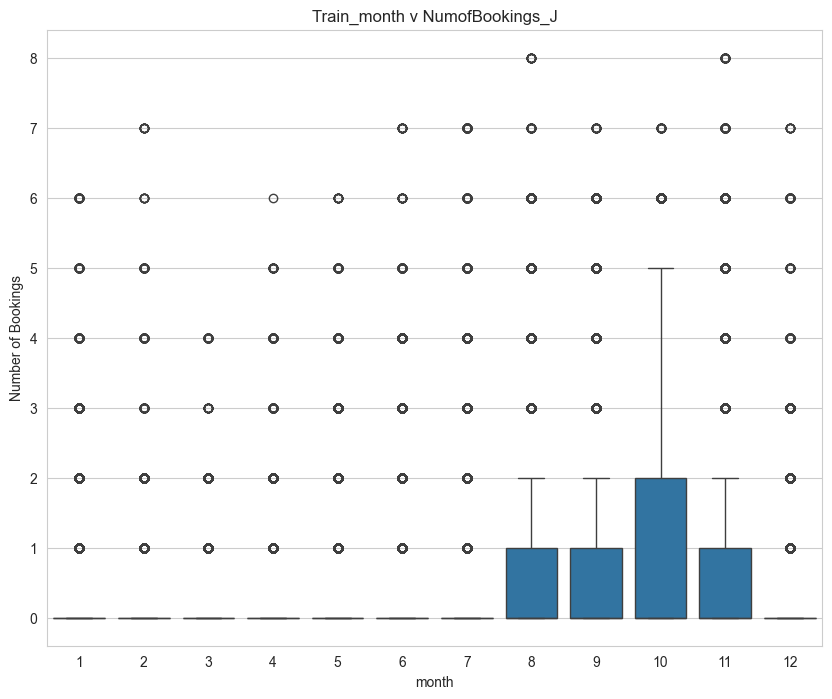

In [171]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=plot_df, x='month', y='Number of Bookings')
ax.set_title('Train_month v NumofBookings_J')
plt.show()

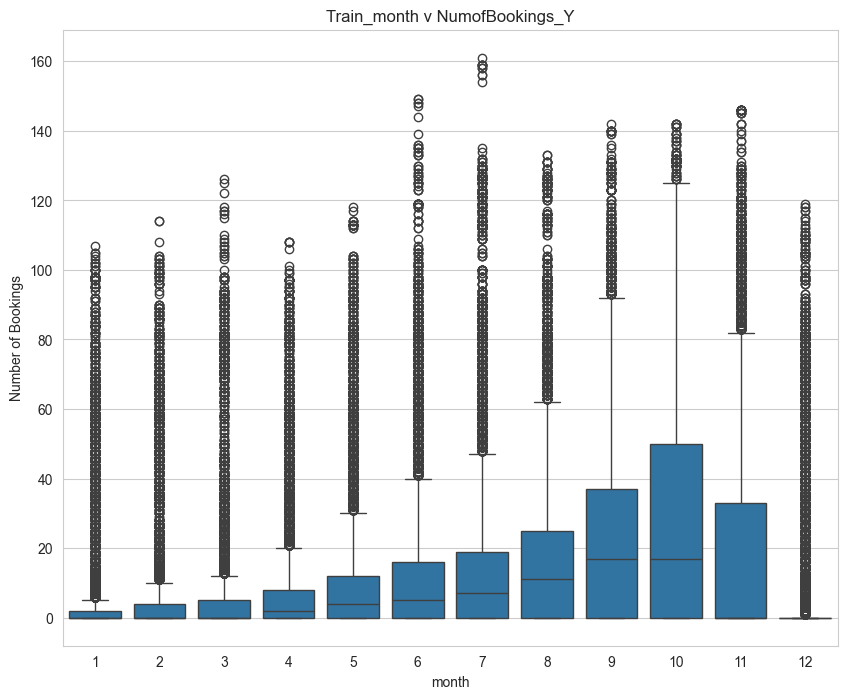

In [174]:
fig, ax = plt.subplots(figsize=(10, 8))

plot_df = pd.concat([new_df[new_df.Cabin_Y], month[new_df.Cabin_Y]], axis=1)
sns.boxplot(data=plot_df, x='month', y='Number of Bookings')
ax.set_title('Train_month v NumofBookings_Y')
plt.show()

In [175]:
new_df.columns

Index(['Number of Bookings', 'Number of days Before Departure',
       'Unique_Flight_ID', 'Origin_AAA', 'Destination_BBB', 'Cabin_J',
       'Cabin_Y', 'dayofmonth', 'year', 'dayofyear', 'hour', 'minute',
       'dayofweek_0', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3',
       'dayofweek_4', 'dayofweek_5', 'dayofweek_6', 'quarter_1', 'quarter_2',
       'quarter_3', 'quarter_4', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

# Traning a model only for J Class

In [176]:
j_df = new_df[new_df.Cabin_J]

In [177]:
j_df

,Number of Bookings,Number of days Before Departure,Unique_Flight_ID,Origin_AAA,Destination_BBB,Cabin_J,Cabin_Y,dayofmonth,year,dayofyear,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3.0,0,1,True,True,True,False,10,2022,100,...,False,True,False,False,False,False,False,False,False,False
0,3.0,1,1,True,True,True,False,9,2022,99,...,False,True,False,False,False,False,False,False,False,False
0,3.0,2,1,True,True,True,False,8,2022,98,...,False,True,False,False,False,False,False,False,False,False
0,3.0,3,1,True,True,True,False,7,2022,97,...,False,True,False,False,False,False,False,False,False,False
0,3.0,4,1,True,True,True,False,6,2022,96,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0.0,361,999,True,True,True,False,18,2021,352,...,False,False,False,False,False,False,False,False,False,True
998,0.0,362,999,True,True,True,False,17,2021,351,...,False,False,False,False,False,False,False,False,False,True
998,0.0,363,999,True,True,True,False,16,2021,350,...,False,False,False,False,False,False,False,False,False,True
998,0.0,364,999,True,True,True,False,15,2021,349,...,False,False,False,False,False,False,False,False,False,True


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = j_df.drop('Number of Bookings', axis=1)
y = j_df['Number of Bookings']

In [179]:
# Since the dataset is divided based on 'Unique_Flight_ID', let's use that for splitting
unique_flight_ids = X['Unique_Flight_ID'].unique()
print(unique_flight_ids)

[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143
 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179
 181 183 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215
 217 219 221 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251
 253 255 257 259 261 263 265 267 269 271 273 275 277 279 281 283 285 287
 289 291 293 295 297 299 301 303 305 307 309 311 313 315 317 319 321 323
 325 327 329 331 333 335 337 339 341 343 345 347 349 351 353 355 357 359
 361 363 365 367 369 371 373 375 377 379 381 383 385 387 389 391 393 395
 397 399 401 403 405 407 409 411 413 415 417 419 421 423 425 427 429 431
 433 435 437 439 441 443 445 447 449 451 453 455 457 459 461 463 465 467
 469 471 473 475 477 479 481 483 485 487 489 491 49

In [180]:

# Split the unique flight IDs into training and testing sets
train_ids, test_ids = train_test_split(unique_flight_ids, test_size=0.2, random_state=42)
print("TRAIN IDS:")
print(train_ids)
print("\n\n\n")
print("Test IDS:")
print(test_ids)
print("\n\n\n")

TRAIN IDS:
[ 35 133 611 830  63 169 874 253 969 717 189 493 708 785 815 479 209 760
  11  91 363 263 793 575  33 852 880 706   7  37 945 121 860 537 353 127
 221 579 451  59 393 391  53  15 838 217 469 863 237 229 491 297 856 677
 990 315 351 459 821 283 669 623 347 477 219 409 291 645 305 671 581 167
 758 331 663 778 149 463 840 635 239 511 543 421 647 417 423 387 704 805
  73 279 667 723 557 770 119 223 507 651  13 659 809 317 301 355 369  21
 501 207 163  77 573 335 876 531 397 756 489 748 389 179 499 327 445 295
   5 185 791 139 685 247 733 193 287 693 673 597 195 561 137  47  75 289
 245 367 405 365 135 832 555 955 641 545 836 996 251 293 700 549 447 457
 173 774 439 259 797 525 599 801 803 649 533 621 225 359 728 768 712 949
 819 467 637 329 273 395 517 465 231 241 449 743 615 255 571 762 215 795
 593 267 665  89 848 131 567 171 485 373 319  25  71  57 341 285 735 625
 443 191 103 481 683 695 357  83 714 413 565 509 764   9 513 828 201 453
 787 427 343 197 585 431 123  95  65 535

In [181]:

# Create training and testing datasets based on these IDs
X_train = X[X['Unique_Flight_ID'].isin(train_ids)]
y_train = y[X['Unique_Flight_ID'].isin(train_ids)]
X_test = X[X['Unique_Flight_ID'].isin(test_ids)]
y_test = y[X['Unique_Flight_ID'].isin(test_ids)]

# Drop the 'Unique_Flight_ID' as it's not needed for training
X_train_Uniq = X_train.copy()
X_test_Uniq = X_test.copy()

X_train = X_train.drop(['Unique_Flight_ID'], axis=1)
X_test = X_test.drop(['Unique_Flight_ID'], axis=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((133224, 33), (33672, 33), (133224,), (33672,))

In [182]:
from tensorflow import keras
from tensorflow.keras import layers

# Build a more robust Neural Network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compile the model with a different optimizer and learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Apply early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=80, restore_best_weights=True
)

# Train the model with validation and early stopping
model.fit(
    X_train_scaled, y_train, epochs=200, batch_size=256,
    validation_split=0.2, callbacks=[early_stopping]
)


Epoch 1/200
417/417 [==============================] - 1s 1ms/step - loss: 0.7847 - mean_absolute_error: 0.5017 - val_loss: 1.5073 - val_mean_absolute_error: 0.6599
Epoch 2/200
417/417 [==============================] - 1s 1ms/step - loss: 0.7220 - mean_absolute_error: 0.4551 - val_loss: 1.4669 - val_mean_absolute_error: 0.6779
Epoch 3/200
417/417 [==============================] - 1s 2ms/step - loss: 0.7145 - mean_absolute_error: 0.4478 - val_loss: 1.4990 - val_mean_absolute_error: 0.6705
Epoch 4/200
417/417 [==============================] - 1s 1ms/step - loss: 0.7088 - mean_absolute_error: 0.4441 - val_loss: 1.5748 - val_mean_absolute_error: 0.6789
Epoch 5/200
417/417 [==============================] - 1s 2ms/step - loss: 0.7082 - mean_absolute_error: 0.4438 - val_loss: 1.4875 - val_mean_absolute_error: 0.6685
Epoch 6/200
417/417 [==============================] - 1s 1ms/step - loss: 0.7044 - mean_absolute_error: 0.4422 - val_loss: 1.4569 - val_mean_absolute_error: 0.6667
Epoch 7/20

In [184]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Absolute Error: {mae}')

1053/1053 [==============================] - 0s 370us/step - loss: 0.7981 - mean_absolute_error: 0.4565
Test Mean Absolute Error: 0.4565019905567169


In [185]:
model.save("model_classes_OnlyJ.h5")

/Users/aniruddhamukherjee/miniconda3/envs/finalytics/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1053/1053 [==============================] - 0s 453us/step - loss: 0.8121 - mean_absolute_error: 0.4646
Test Mean Absolute Error: 0.46459275484085083
1053/1053 [==============================] - 0s 305us/step


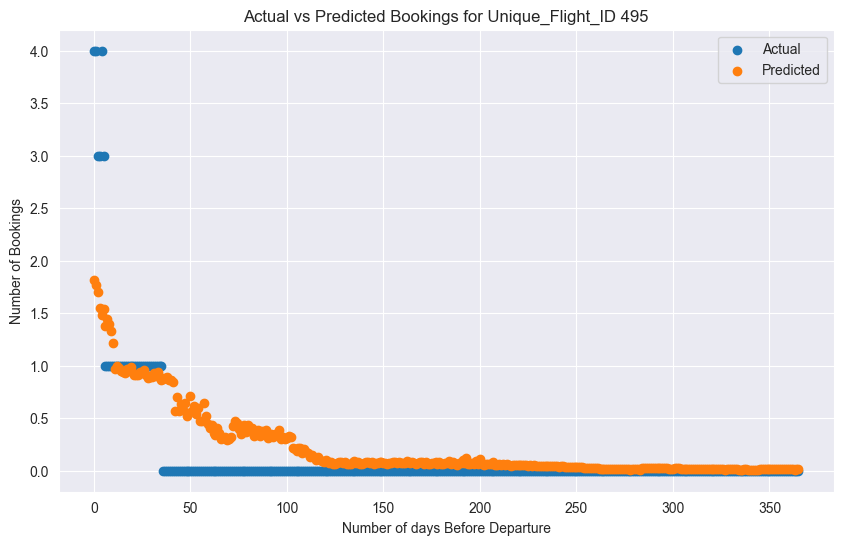

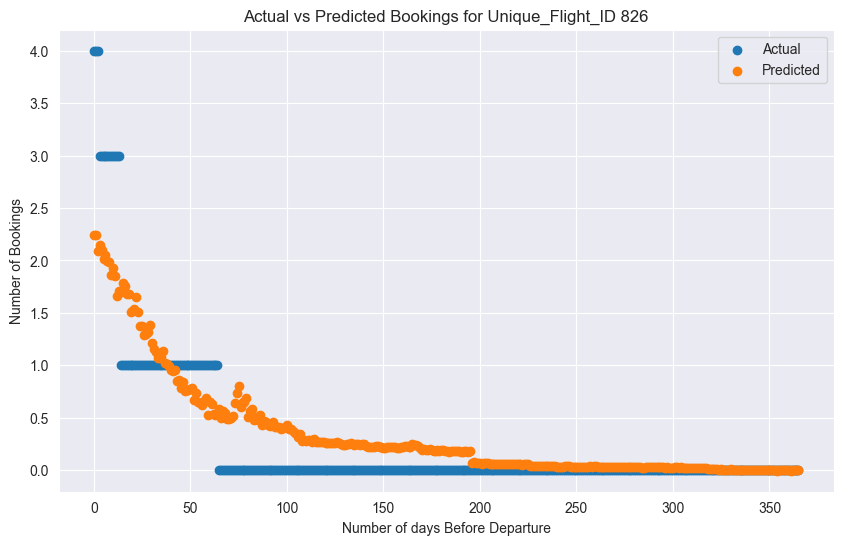

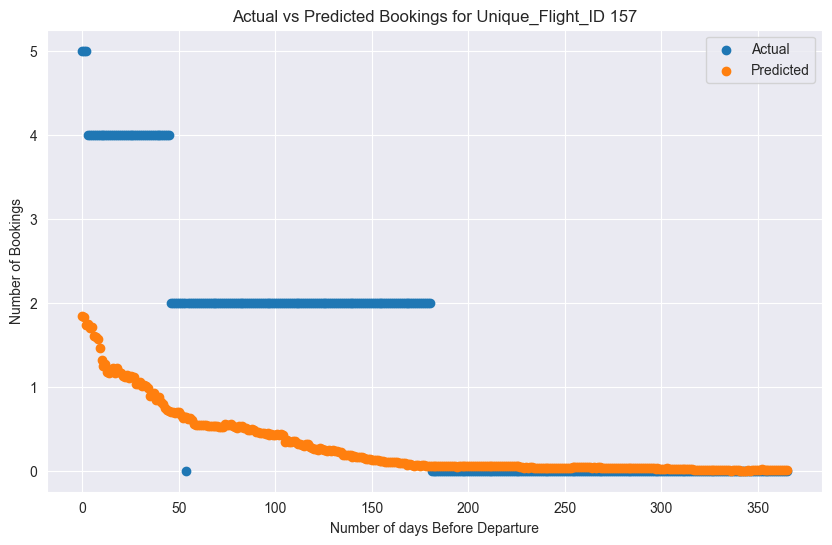

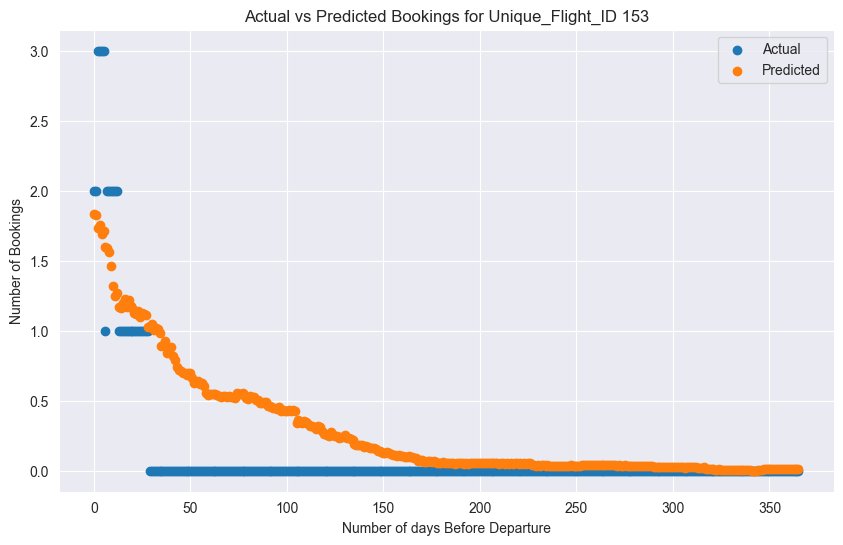

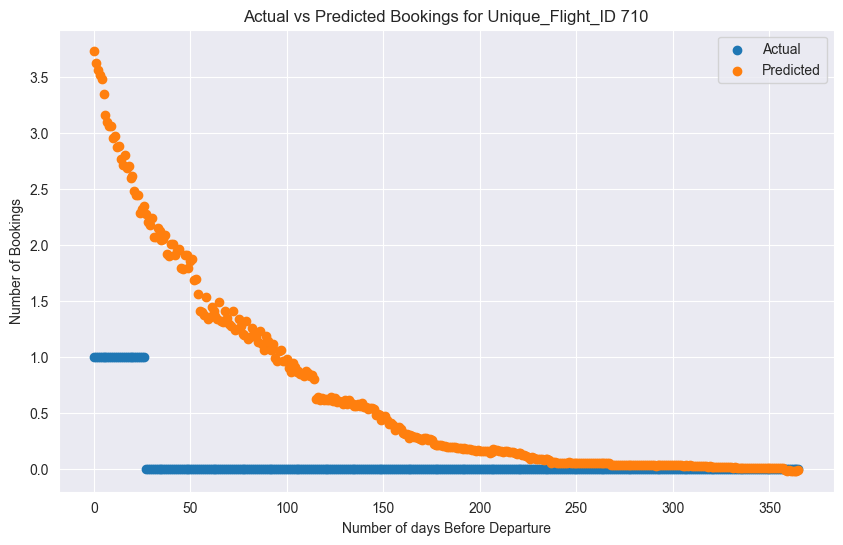

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Absolute Error: {mae}')

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Create a DataFrame for the test set with actual and predicted values
test_df = X_test_Uniq.copy()
test_df['Actual Bookings'] = y_test.values
test_df['Predicted Bookings'] = y_pred



# Plot graphs for 5 Unique_Flight_IDs
unique_test_ids = test_df['Unique_Flight_ID'].unique()
sample_ids = np.random.choice(unique_test_ids, 5, replace=False)

for flight_id in sample_ids:
    temp_df = test_df[test_df['Unique_Flight_ID'] == flight_id]
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Actual vs Predicted Bookings for Unique_Flight_ID {flight_id}')
    plt.xlabel('Number of days Before Departure')
    plt.ylabel('Number of Bookings')
    
    plt.scatter(temp_df['Number of days Before Departure'], temp_df['Actual Bookings'], label='Actual')
    plt.scatter(temp_df['Number of days Before Departure'], temp_df['Predicted Bookings'], label='Predicted')
    
    plt.legend()
    plt.show()


# Only Y

In [189]:
y_df = new_df[new_df.Cabin_Y]
y_df

,Number of Bookings,Number of days Before Departure,Unique_Flight_ID,Origin_AAA,Destination_BBB,Cabin_J,Cabin_Y,dayofmonth,year,dayofyear,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1,74.0,0,2,True,True,False,True,10,2022,100,...,False,True,False,False,False,False,False,False,False,False
1,75.0,1,2,True,True,False,True,9,2022,99,...,False,True,False,False,False,False,False,False,False,False
1,75.0,2,2,True,True,False,True,8,2022,98,...,False,True,False,False,False,False,False,False,False,False
1,80.0,3,2,True,True,False,True,7,2022,97,...,False,True,False,False,False,False,False,False,False,False
1,79.0,4,2,True,True,False,True,6,2022,96,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0.0,361,1000,True,True,False,True,18,2021,352,...,False,False,False,False,False,False,False,False,False,True
999,0.0,362,1000,True,True,False,True,17,2021,351,...,False,False,False,False,False,False,False,False,False,True
999,0.0,363,1000,True,True,False,True,16,2021,350,...,False,False,False,False,False,False,False,False,False,True
999,0.0,364,1000,True,True,False,True,15,2021,349,...,False,False,False,False,False,False,False,False,False,True


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = y_df.drop('Number of Bookings', axis=1)
y = y_df['Number of Bookings']

In [191]:
unique_flight_ids = X['Unique_Flight_ID'].unique()
print(unique_flight_ids)

[   2    4    6    8   10   12   14   16   18   20   22   24   26   28
   30   32   34   36   38   40   42   44   46   48   50   52   54   56
   58   60   62   64   66   68   70   72   74   76   78   80   82   84
   86   88   90   92   94   96   98  100  102  104  106  108  110  112
  114  116  118  120  122  124  126  128  130  132  134  136  138  140
  142  144  146  148  150  152  154  156  158  160  162  164  166  168
  170  172  174  176  178  180  182  184  186  188  190  192  194  196
  198  200  202  204  206  208  210  212  214  216  218  220  222  224
  226  228  230  232  234  236  238  240  242  244  246  248  250  252
  254  256  258  260  262  264  266  268  270  272  274  276  278  280
  282  284  286  288  290  292  294  296  298  300  302  304  306  308
  310  312  314  316  318  320  322  324  326  328  330  332  334  336
  338  340  342  344  346  348  350  352  354  356  358  360  362  364
  366  368  370  372  374  376  378  380  382  384  386  388  390  392
  394 

In [194]:

# Split the unique flight IDs into training and testing sets
train_ids, test_ids = train_test_split(unique_flight_ids, test_size=0.2, random_state=42)
print("TRAIN IDS:")
print(train_ids)
print(len(train_ids))
print("\n\n\n")
print("Test IDS:")
print(test_ids)
print(len(test_ids))
print("\n\n\n")


# Create training and testing datasets based on these IDs
X_train = X[X['Unique_Flight_ID'].isin(train_ids)]
y_train = y[X['Unique_Flight_ID'].isin(train_ids)]
X_test = X[X['Unique_Flight_ID'].isin(test_ids)]
y_test = y[X['Unique_Flight_ID'].isin(test_ids)]

# Drop the 'Unique_Flight_ID' as it's not needed for training
X_train_Uniq = X_train.copy()
X_test_Uniq = X_test.copy()

X_train = X_train.drop(['Unique_Flight_ID'], axis=1)
X_test = X_test.drop(['Unique_Flight_ID'], axis=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

TRAIN IDS:
[ 422  372  738 1000  788  354  783  992  622  749  610  648  298  995
  727  777  140  773  978  386  452  264  472  250  922  420  478  604
  729  598  920  498  765  476  861   40  744  114  970  550  984  964
  356   52  720   86  686  932  900  624  310  254  562  732   64  228
  418  966  348  116  594   50   36  907  134  877  986  582  370  190
  868  492   48  889  918  496   12  234   92  883  991   34   98  512
  899    8  532  458  122  394  976  222  802  652   60  460  843   54
   16  364  948  218   76  316  968  238  800  230  584  408  352  464
  502  290  390  825  851  942  574  816  934  284  818  136  902  456
  338  378  925  841  524  388  164  220  570  292  186  306  564  870
  552  796  168  208  332  328  400  940  150  694  974  240  928  672
  792  881  576  600  664  857  616   74  280  508  638  120  224  885
  837  526  806  302  534  853   78  707  398  580  294  869  296  859
  642  248  824  194  288  480  678  196  872  588  784  246  368 

((159210, 33), (39894, 33), (159210,), (39894,))

In [195]:
from tensorflow import keras
from tensorflow.keras import layers



# Build a more robust Neural Network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compile the model with a different optimizer and learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Apply early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=80, restore_best_weights=True
)

# Train the model with validation and early stopping
model.fit(
    X_train_scaled, y_train, epochs=200, batch_size=256,
    validation_split=0.2, callbacks=[early_stopping]
)


Epoch 1/200
498/498 [==============================] - 1s 2ms/step - loss: 217.2286 - mean_absolute_error: 8.3181 - val_loss: 184.9726 - val_mean_absolute_error: 7.9648
Epoch 2/200
498/498 [==============================] - 1s 2ms/step - loss: 154.0157 - mean_absolute_error: 6.8964 - val_loss: 179.9875 - val_mean_absolute_error: 7.6487
Epoch 3/200
498/498 [==============================] - 1s 1ms/step - loss: 148.8002 - mean_absolute_error: 6.7773 - val_loss: 167.2150 - val_mean_absolute_error: 7.2545
Epoch 4/200
498/498 [==============================] - 1s 2ms/step - loss: 144.6259 - mean_absolute_error: 6.6965 - val_loss: 163.3595 - val_mean_absolute_error: 7.0294
Epoch 5/200
498/498 [==============================] - 1s 1ms/step - loss: 143.6759 - mean_absolute_error: 6.6528 - val_loss: 170.6069 - val_mean_absolute_error: 7.3772
Epoch 6/200
498/498 [==============================] - 1s 1ms/step - loss: 140.6808 - mean_absolute_error: 6.5985 - val_loss: 170.3411 - val_mean_absolute_

In [196]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Absolute Error: {mae}')

1247/1247 [==============================] - 0s 379us/step - loss: 160.4839 - mean_absolute_error: 6.6902
Test Mean Absolute Error: 6.690207004547119


In [197]:
model.save("model_classes_OnlyY.h5")

/Users/aniruddhamukherjee/miniconda3/envs/finalytics/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1247/1247 [==============================] - 0s 345us/step - loss: 162.8154 - mean_absolute_error: 6.7456
Test Mean Absolute Error: 6.745579719543457
1247/1247 [==============================] - 0s 298us/step


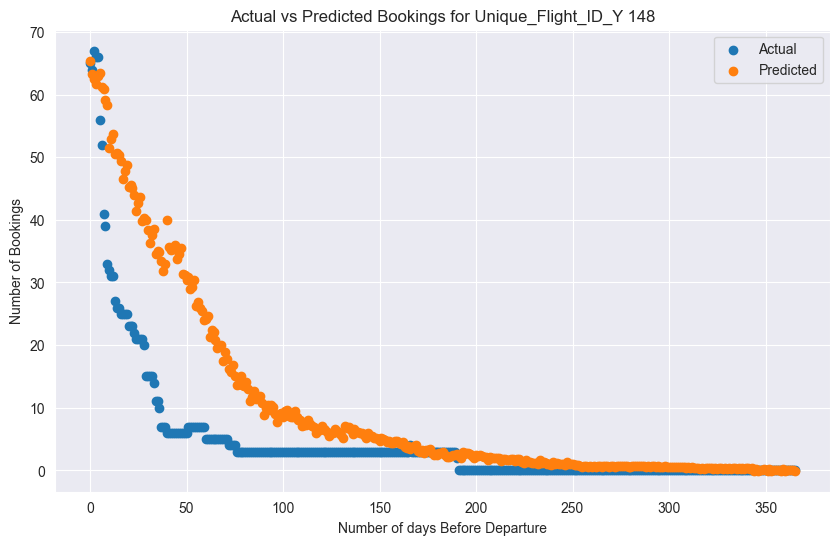

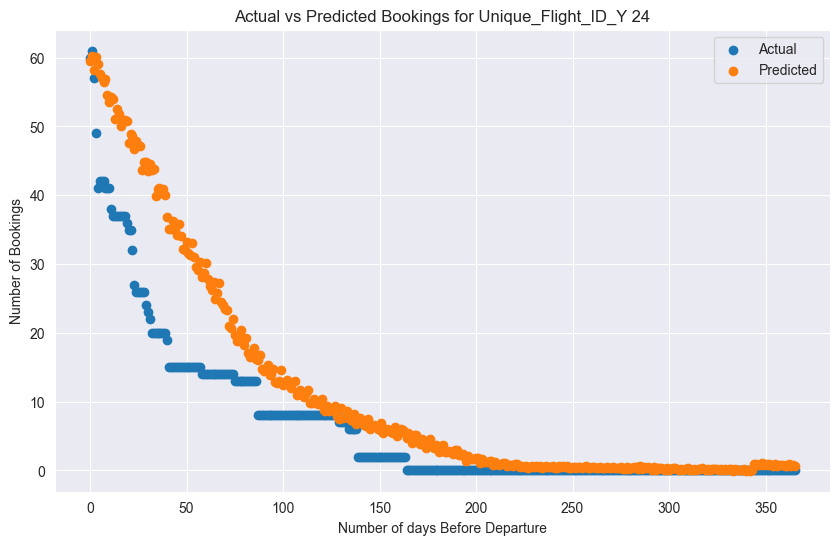

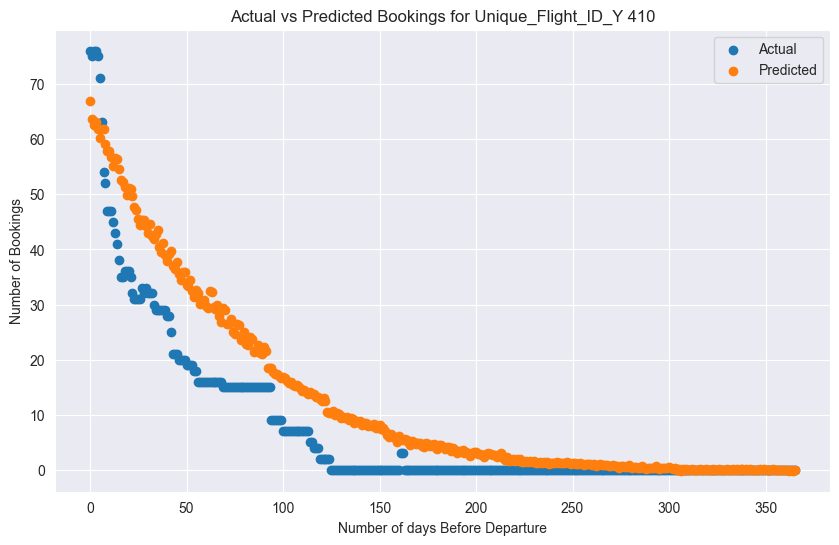

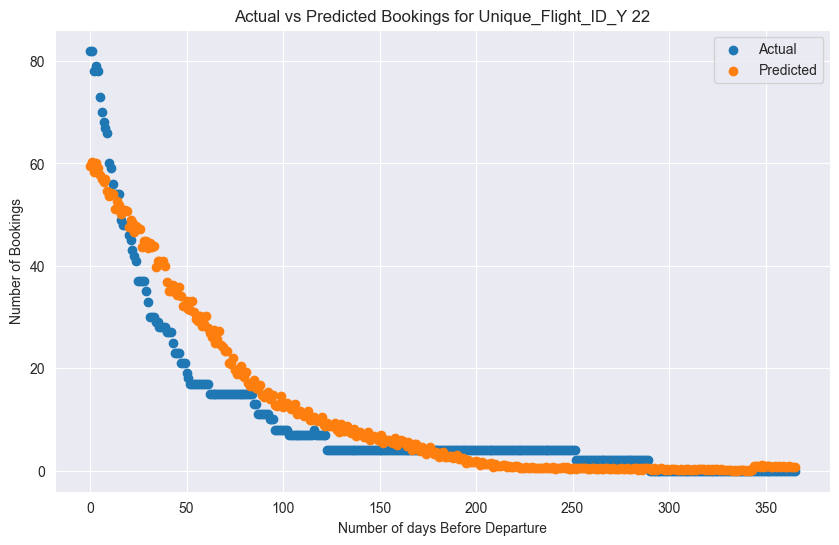

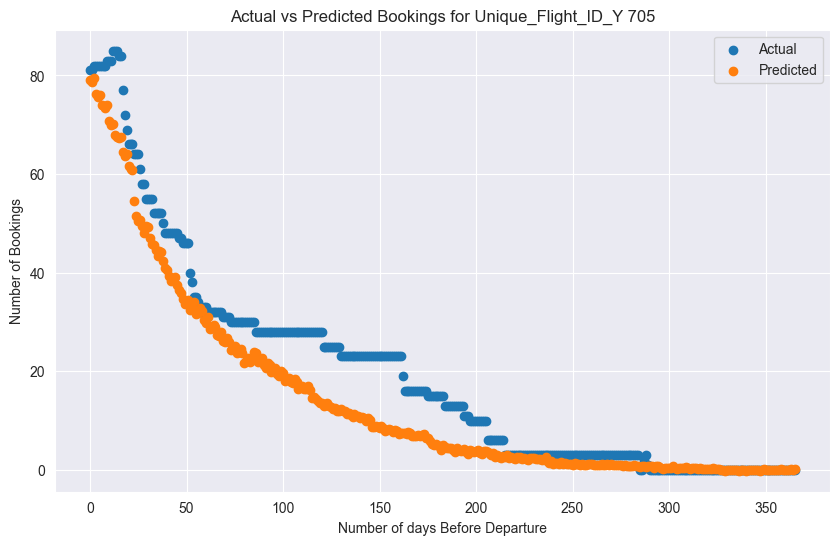

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Absolute Error: {mae}')

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Create a DataFrame for the test set with actual and predicted values
test_df = X_test_Uniq.copy()
test_df['Actual Bookings'] = y_test.values
test_df['Predicted Bookings'] = y_pred



# Plot graphs for 5 Unique_Flight_IDs
unique_test_ids = test_df['Unique_Flight_ID'].unique()
sample_ids = np.random.choice(unique_test_ids, 5, replace=False)

for flight_id in sample_ids:
    temp_df = test_df[test_df['Unique_Flight_ID'] == flight_id]
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Actual vs Predicted Bookings for Unique_Flight_ID_Y {flight_id}')
    plt.xlabel('Number of days Before Departure')
    plt.ylabel('Number of Bookings')
    
    plt.scatter(temp_df['Number of days Before Departure'], temp_df['Actual Bookings'], label='Actual')
    plt.scatter(temp_df['Number of days Before Departure'], temp_df['Predicted Bookings'], label='Predicted')
    
    plt.legend()
    plt.show()


1247/1247 [==============================] - 1s 543us/step - loss: 160.4839 - mean_absolute_error: 6.6902
Test Mean Absolute Error: 6.690207004547119
1247/1247 [==============================] - 0s 333us/step


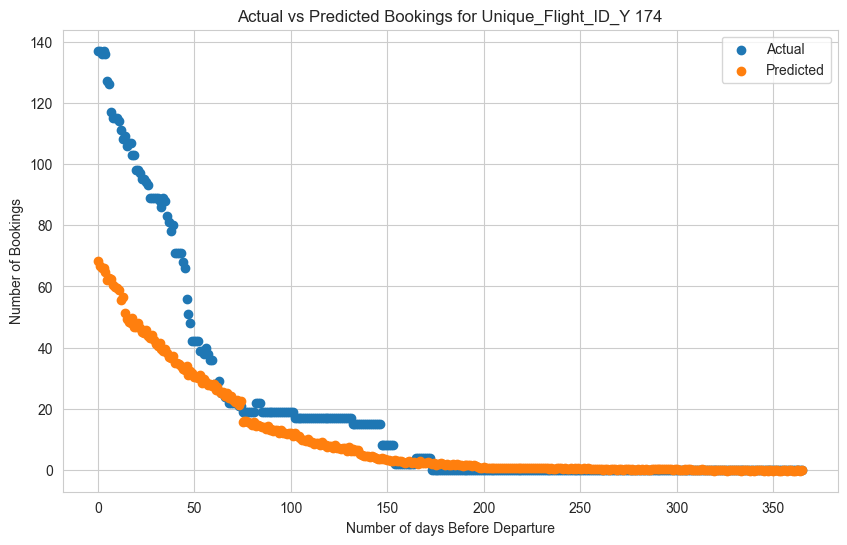

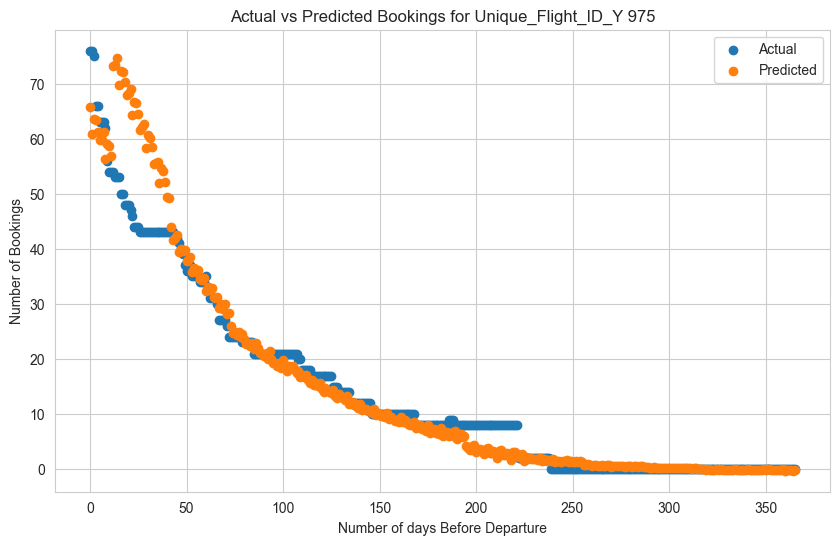

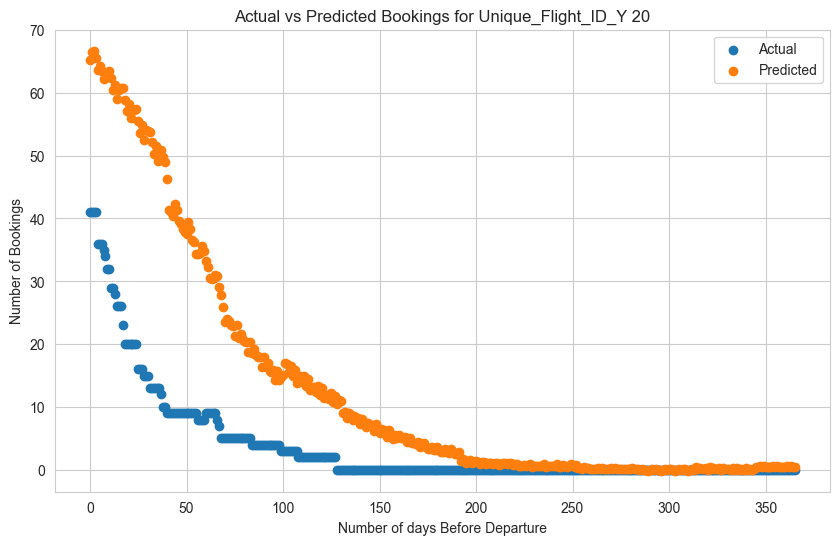

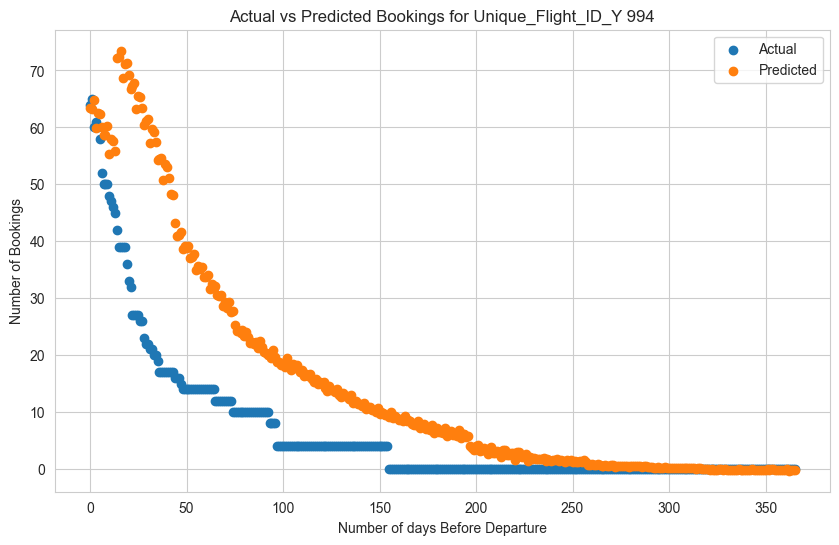

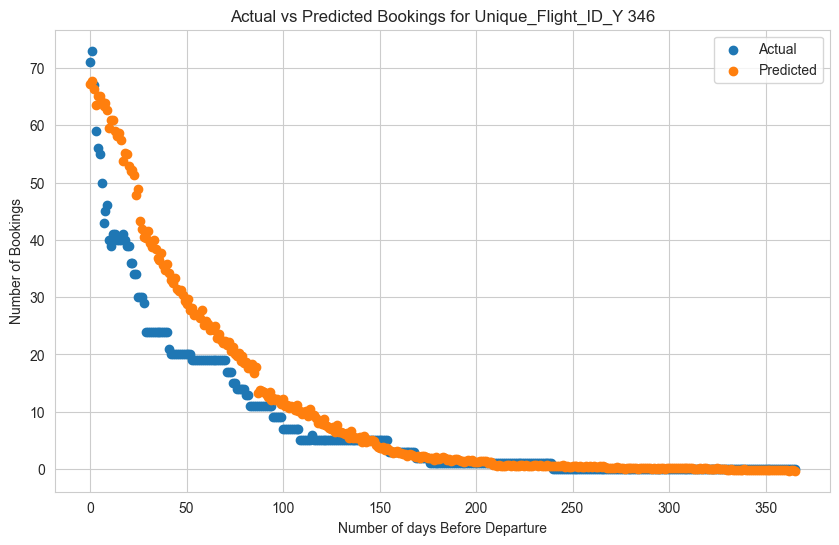

In [198]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Absolute Error: {mae}')

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Create a DataFrame for the test set with actual and predicted values
test_df = X_test_Uniq.copy()
test_df['Actual Bookings'] = y_test.values
test_df['Predicted Bookings'] = y_pred



# Plot graphs for 5 Unique_Flight_IDs
unique_test_ids = test_df['Unique_Flight_ID'].unique()
sample_ids = np.random.choice(unique_test_ids, 5, replace=False)

for flight_id in sample_ids:
    temp_df = test_df[test_df['Unique_Flight_ID'] == flight_id]
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Actual vs Predicted Bookings for Unique_Flight_ID_Y {flight_id}')
    plt.xlabel('Number of days Before Departure')
    plt.ylabel('Number of Bookings')
    
    plt.scatter(temp_df['Number of days Before Departure'], temp_df['Actual Bookings'], label='Actual')
    plt.scatter(temp_df['Number of days Before Departure'], temp_df['Predicted Bookings'], label='Predicted')
    
    plt.legend()
    plt.show()


# End